In [ ]:
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pylab as plt
import blimpy
from blimpy import Waterfall
from blimpy import calcload
import os
import glob
import numpy as np
import time
from scipy.stats import norm, kurtosis, kurtosistest
import scipy
import numpy.ma as ma
import seaborn as sns

import sys
file_path = '/lustre/aoc/students/jsofair/playing-with-cosmic-data/filterbank/'
sys.path.insert(1, file_path[:54])
from analysis_functions import plot_tavg_power

In [43]:
del water5

In [2]:
file_list = glob.glob(os.path.join(file_path,'*.fil'))

ml_list = []
for i, file in enumerate(file_list):
    ml = blimpy.calcload.calc_max_load(os.path.join(file))
    ml_list.append(ml)
    print(f'{ml} -- {file[65:]}')

11.0 -- band_test_AC_CO-beam0001.fil
9.0 -- Band_Test_BD_C512-beam0001.fil
9.0 -- band_test_AC_C512-beam0001.fil
11.0 -- Band_Test_BD_C0-beam0001.fil
7.0 -- band_test_GPU3_BD_C32-beam0001.fil
11.0 -- band_test_AC_C32-beam0001.fil
4.0 -- band_test_AC_C544-beam0001.fil


In [44]:
t0=time.time()

water6 = Waterfall(os.path.normpath(file_list[6]), max_load = ml_list[6])

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

Elapsed time: 32.10851836204529


In [ ]:
t0 = time.time()


# for i in range(0, len(file_list)):
#     exec(f'water{i} = Waterfall(os.path.normpath(file_list[{i}]), max_load = ml_list[{i}])')
#     exec(f'water_list.append(water{i})')
    
    
water0 = Waterfall(os.path.normpath(file_list[0]), max_load = ml_list[0])
water1 = Waterfall(os.path.normpath(file_list[1]), max_load = ml_list[1])
water2 = Waterfall(os.path.normpath(file_list[2]), max_load = ml_list[2])
water3 = Waterfall(os.path.normpath(file_list[3]), max_load = ml_list[3])
water4 = Waterfall(os.path.normpath(file_list[4]), max_load = ml_list[4])
water5 = Waterfall(os.path.normpath(file_list[5]), max_load = ml_list[5])
water6 = Waterfall(os.path.normpath(file_list[6]), max_load = ml_list[6])

water_list = [water0, water1, water2, water3, water4, water5, water6]
# print(water_list)

t1 = time.time()
print(f'Elapsed time: {t1 - t0}')

In [5]:
fig, ax = plt.subplots()
ax.set_xlim(f_start, f_stop)
ax.set_ylim(p_start, p_stop)
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Time-Averaged Power (???)')

ax.plot(wf_in.get_freqs(), wf_pwr_mean_integration)
plt.show()
plt.close()

Elapsed time: 98.73659014701843


In [45]:
water6.info()
# 640 channels
# ~4.2 M fine frequency channels


--- File Info ---
      machine_id :                                0
    telescope_id :                               -1
         src_raj :                 4:09:22.00873993
         src_dej :                12:17:39.84749624
        az_start :              6.927632722041e-310
        za_start :             4.6890767235416e-310
       data_type :                                1
            fch1 :           2540.4999961853027 MHz
            foff :           -7.62939453125e-06 MHz
          nchans :                          4194304
          nbeams :                                2
           ibeam :                                1
           nbits :                               32
   tstart (ISOT) :          2023-05-10T22:08:42.502
    tstart (MJD) :               60074.922714145854
           tsamp :                         0.131072
            nifs :                                1
     barycentric :                                1
   pulsarcentric :                           

In [6]:
water0.plot_waterfall()

In [ ]:
water0.plot_spectrum()

In [42]:
# print(np.mean(water3.data))
# print(f'{np.shape(np.mean(water3.data))}')

In [ ]:
# print(f'{np.shape(water3.data[500])}')
print(f'{(np.mean(water3.data, axis=2))}')
# print(f'{(water3.data[500])}')

In [34]:
a = [
    [1,2,3],
    [1,2,3]
]
np.mean(a, axis=1)

array([2., 2.])

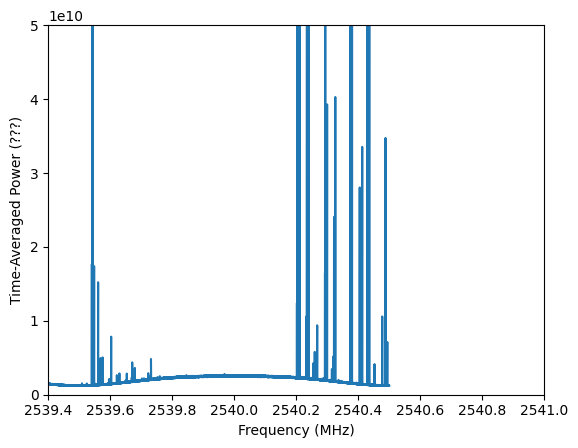

In [48]:
plot_tavg_power(water6, f_start=2539.4, f_stop=2541)

In [19]:
plt.close('all')

In [ ]:
water0.plot_kurtosis()